<a href="https://colab.research.google.com/github/leticiamchd/Hospital_Length_of_Stay/blob/main/Hospital_LoS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hospital Length of Stay Exploratory Data Analysis
The goal of this EDA is to analyze the characteristics of longer Length of Stay (LoS) (here were considered LoS higher than 30 days).

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# creating a dataframe to the train data and the variables dictionary

df = pd.read_csv("train.csv")
df_dict = pd.read_csv("train_data_dict.csv")

In [4]:
# looking into the variables diactionary
df_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [5]:
# looking into the 5 fisrts entries of the dataset 
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


* **With a first look it's possible to see that this dataset contains a lot of encoded information**
* **For this algorithm I will predict the lenght of Stay into 2 categories: < 30 days and > 30 days; so it is necessary to make a change**

In [6]:
# Let's check the size of this dataset 
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset contains 318438 rows and 18 columns.


In [7]:
# Let's check the amount of null values
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

**We can see that only 2 variables have explicity missing values, possibly a small percentage of the dataset considering that there's 318438 rows, but let's check if this perception is true.**

In [8]:
# Checking the percentage of null values 
df.isnull().sum() / df.shape[0] * 100

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

**This confirms the perception about the amount of null values, is a small part of the dataset.**

In [9]:
# Let's check if there's any duplicate rows
df.duplicated().sum()

0

**There are none duplicate rows**

In [10]:
# Checking the type of each columns
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [11]:
# Looking into the characteristics of the numerical variables
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


* Possibly there isn't any duplicated rows in `case_id` and it starts at 1 and ends at 318,438
* `Hospital_code` starts at 1 and ends at 32
* `City_Code_Hospital` starts at 1 and ends at 13
* There's hospital that have none availables extra rooms in Hospital while another that have 24 availables extra rooms. But this seems to be an outlier because when we look into the mean, median and 75th percentile, they're all equal or above 4.
* `Bed Grade` starts at 1 and ends at 4
* `patientid` starts at 1 and ends at 131,624, possibly because there's patients that were admitted at the hospital more than once 
* `City_Code_Patient` starts at 1 and ends at 38
* When we look at the amount of visitors with patients, we can see that some patient received none visiting, while some received 32 visitors. But the same way as the variable about the amount of extra rooms, this 32 seems like to be and outlier because when we look into the mean, median and 75th percentile, they're all equal or above 4.
* When we look the amount of admission deposit the majority pays less than $5000

In [12]:
# Looking into the characteristics of the categorical variables and target ("Stay")
df.describe(include=object)

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


* There's 7 different hospital type codes, more frequent the "a" type
* There's 3 different hospital region codes, more frequent the "X" type
* There's 5 different departments, more frequent the gynecology one
* There's 6 different ward types, more frequent the "R" type
* There's 6 different ward facility codes, more frequent the "F" type
* There's 3 different types of admission, more frequent the Trauma one
* There's 3 different severity of illness, more frequent the Moderate one
* The age is classified into ranges, so the more frequent is between 41-50
* As the age, the lenght of stay is also classified into ranges, the more frequent between 21-30

In [13]:
df['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

# Data Cleaning

**The proposal for this analysis is to separate the lenght of Stay into 2 categories: ≤ 30 days and > 30 day.**

In [14]:
# Creating a copy from the original dataset
df_EDA = df.copy()

### Null values

In [15]:
# Checking the amout of null values, in percentage, and sorting
(df_EDA.isnull().sum() / df_EDA.shape[0] * 100).sort_values(ascending=False)

City_Code_Patient                    1.423197
Bed Grade                            0.035486
Hospital_code                        0.000000
Admission_Deposit                    0.000000
Age                                  0.000000
Visitors with Patient                0.000000
Severity of Illness                  0.000000
Type of Admission                    0.000000
patientid                            0.000000
case_id                              0.000000
Ward_Facility_Code                   0.000000
Ward_Type                            0.000000
Department                           0.000000
Available Extra Rooms in Hospital    0.000000
Hospital_region_code                 0.000000
City_Code_Hospital                   0.000000
Hospital_type_code                   0.000000
Stay                                 0.000000
dtype: float64

**The amount of null values in both columns (`City_Code_Patient` and `Bed Grade`) is not that big, so I'll just drop this row**

In [16]:
# Checking the shape of the dataset before droping the null values
df_EDA.shape

(318438, 18)

In [17]:
# Dropping all the rows that contains any null values
df_EDA.dropna(axis = 0, inplace=True)

In [18]:
# Checking if there's still null values
df_EDA.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [19]:
# Checking the shape of the dataset after droping the null values
df_EDA.shape

(313793, 18)

**Still a large dataset**

### Some datatypes need to be changed

In [20]:
df_EDA.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [21]:
# Checking each column that is a float type
df_EDA["Bed Grade"].value_counts()

2.0    122297
3.0    108878
4.0     56406
1.0     26212
Name: Bed Grade, dtype: int64

**There's no need for this column to be a float type**

In [22]:
df_EDA["City_Code_Patient"].value_counts()

8.0     123977
2.0      38835
1.0      26357
7.0      23797
5.0      20079
4.0      15379
9.0      11794
15.0      8943
10.0      8172
6.0       6005
12.0      5646
3.0       3772
23.0      3697
14.0      2927
16.0      2252
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

**There's no need for this column to be a float type**

In [23]:
df_EDA["Admission_Deposit"].value_counts()

4469.0     386
4277.0     369
4624.0     343
4789.0     295
4400.0     280
          ... 
10137.0      1
2016.0       1
8511.0       1
1872.0       1
2349.0       1
Name: Admission_Deposit, Length: 7283, dtype: int64

**This column refers to money, so it's a right thing to be as float type**

In [24]:
# Changing the column "Bed Grade" and "City_Code_Patient" to int type
df_EDA["Bed Grade"] = df_EDA["Bed Grade"].apply(np.int64)
df_EDA["City_Code_Patient"] = df_EDA["City_Code_Patient"].apply(np.int64)

In [25]:
# Checking if the type changed
df_EDA.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                              int64
patientid                              int64
City_Code_Patient                      int64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

## Target modification

In [26]:
# Checking the distribution of the target
df_EDA["Stay"].value_counts()

21-30                 86316
11-20                 77095
31-40                 54312
51-60                 34463
0-10                  23250
41-50                 11541
71-80                 10096
More than 100 Days     6548
81-90                  4761
91-100                 2713
61-70                  2698
Name: Stay, dtype: int64

In [27]:
# Changing the target into 2 categories: ≤ 10 days and > 10 days
df_EDA["Stay"] = df_EDA["Stay"].replace(['0-10', '11-20', '21-30'], 0)
df_EDA["Stay"] = df_EDA["Stay"].replace(['31-40','41-50','51-60', 
                                         '61-70', '71-80', '81-90',
                                         '91-100', 'More than 100 Days'], 1)

**In this modification, lengh of stay ≤ 30 days will be 0 and > 30 days will be 1**

In [28]:
# Checking the new distribution of the target
df_EDA["Stay"].value_counts()

0    186661
1    127132
Name: Stay, dtype: int64

In [29]:
# Checking if this modification created any null values
df_EDA.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

# Exploratory Data Analysis

In [30]:
# Creating another dataframe with only the categorical columns
df_EDA_obj = df_EDA.select_dtypes(include='object')

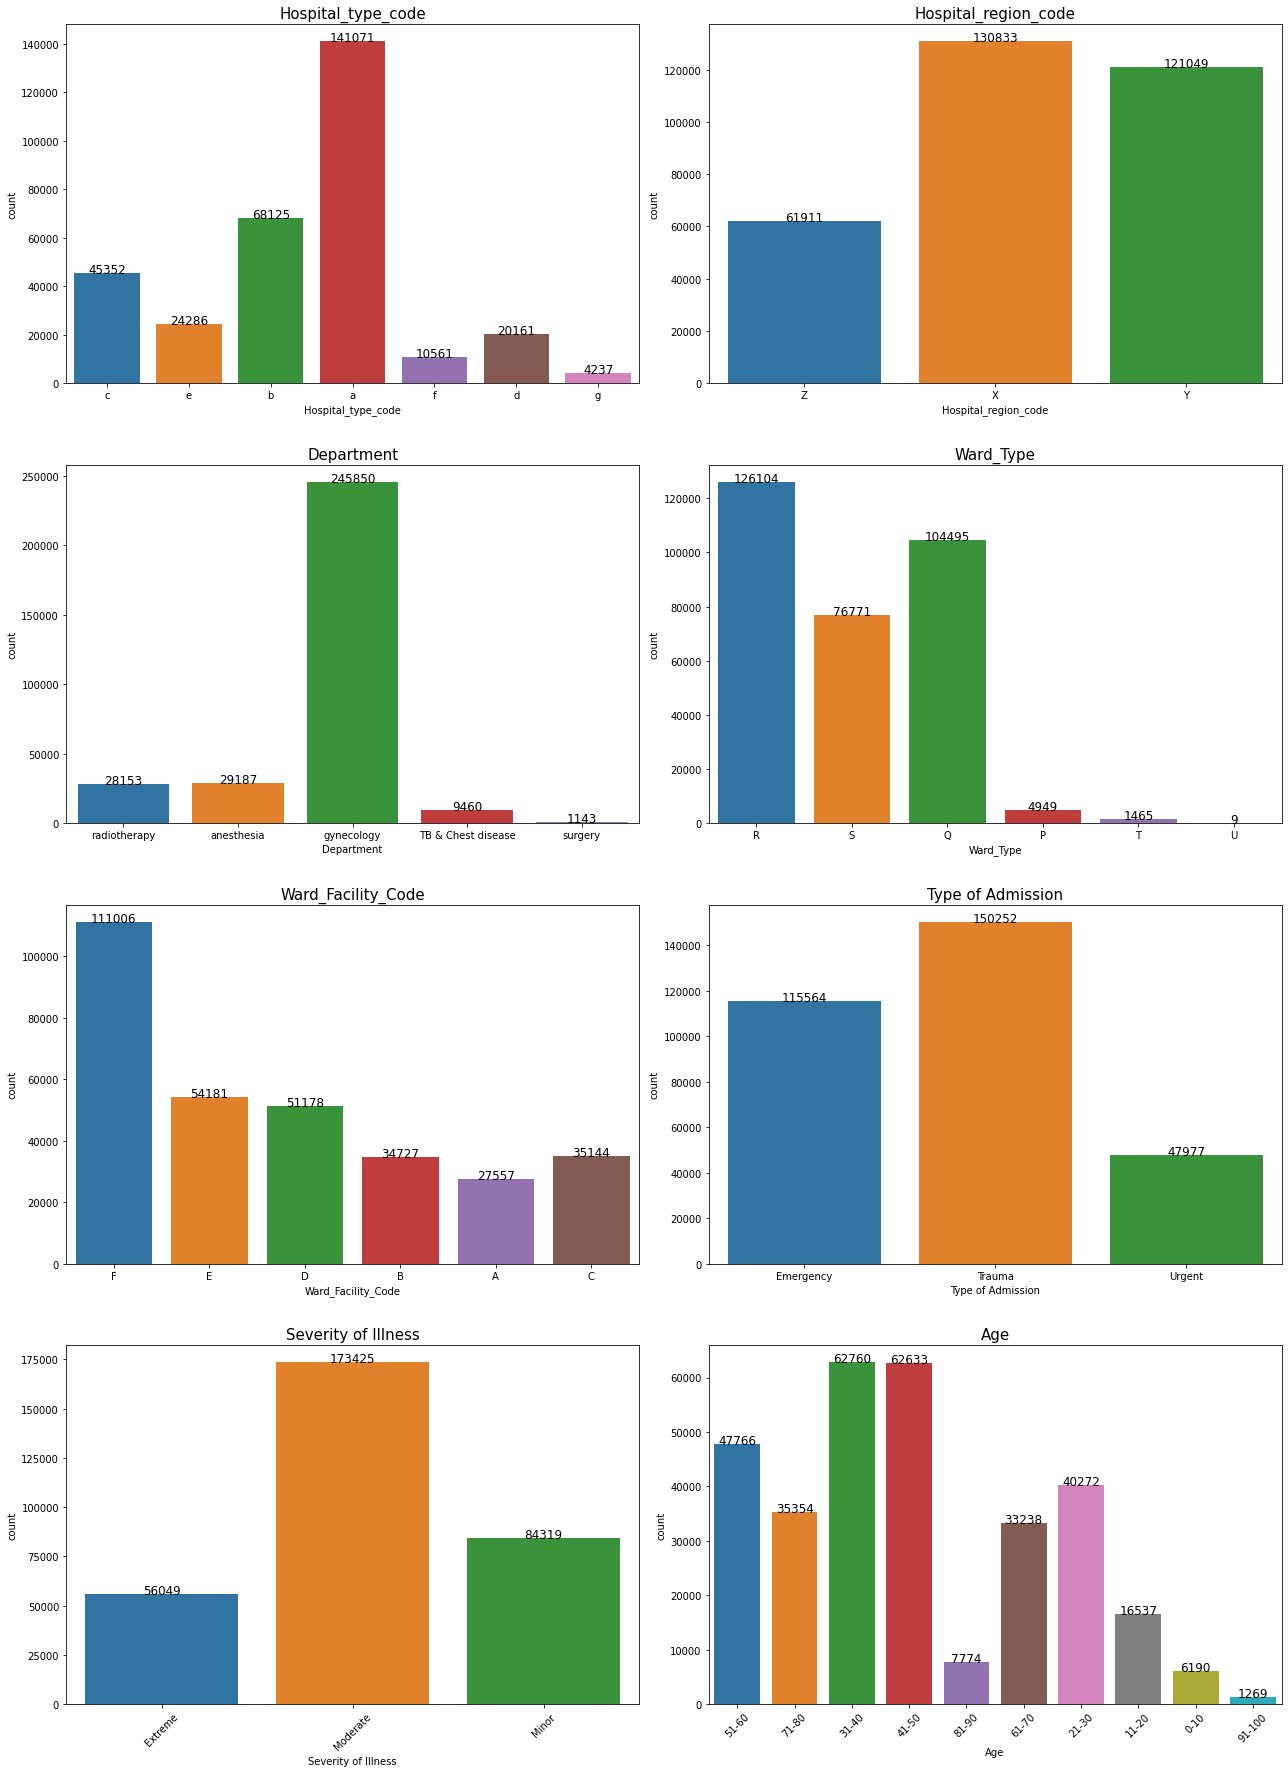

In [31]:
# Ploting the distribution of all categorical data

# Figure Size
plt.figure(figsize = (18,30))

# List of columns
column_list = list(df_EDA_obj.columns.values)

# Counter
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df_EDA_obj.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

In [32]:
# Creating another dataframe with only the numerical columns, excepting for case id, patient id and admission deposit
# The column "Admission_Deposit" were droped because is the only one with continuum variable

df_EDA_num = df_EDA.select_dtypes(include='number').drop(columns=['case_id','patientid', 'Admission_Deposit'], axis=1)

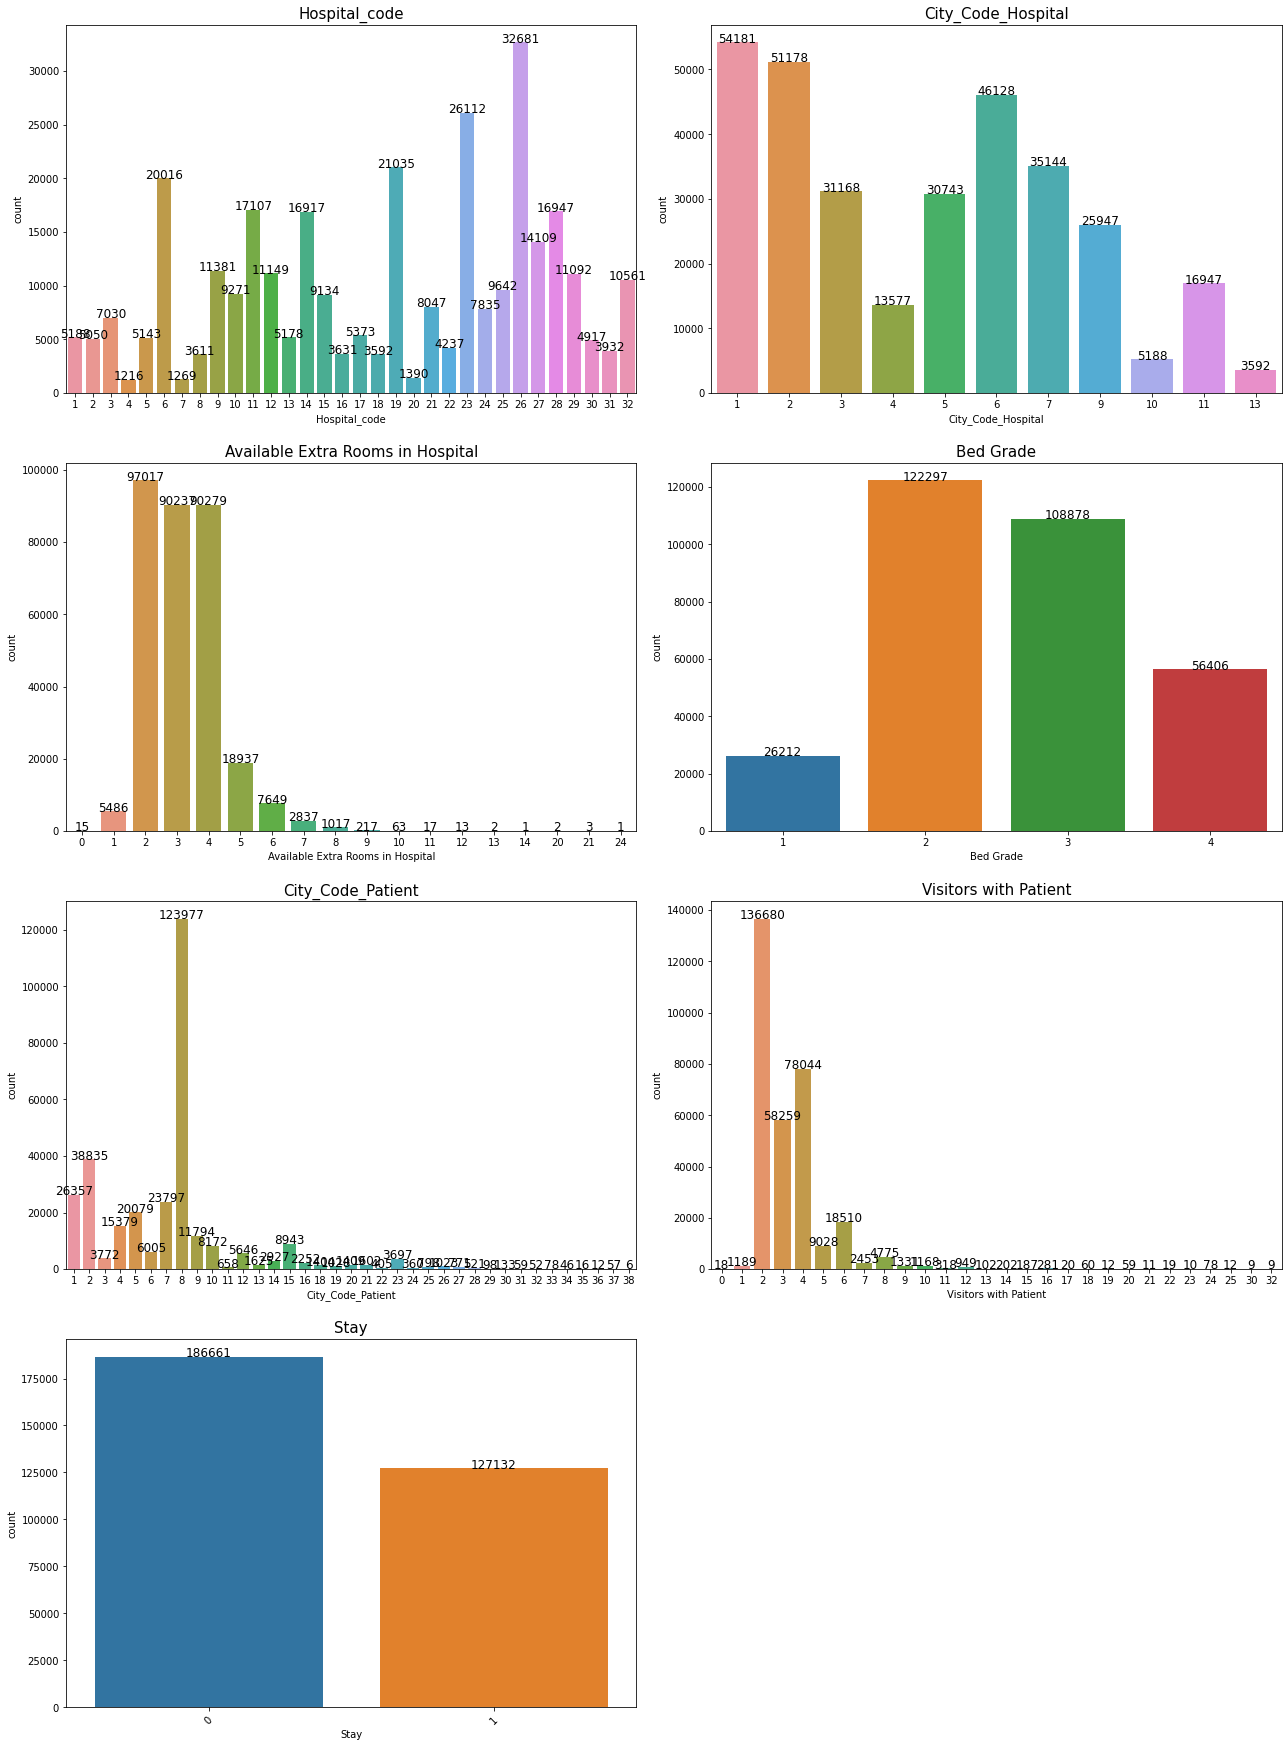

In [33]:
# Ploting the distribution of all numerical data, that works as a categorical one

# Figure Size
plt.figure(figsize = (18,30))

# List of columns
column_list = list(df_EDA_num.columns.values)

# Counter
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df_EDA_num.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


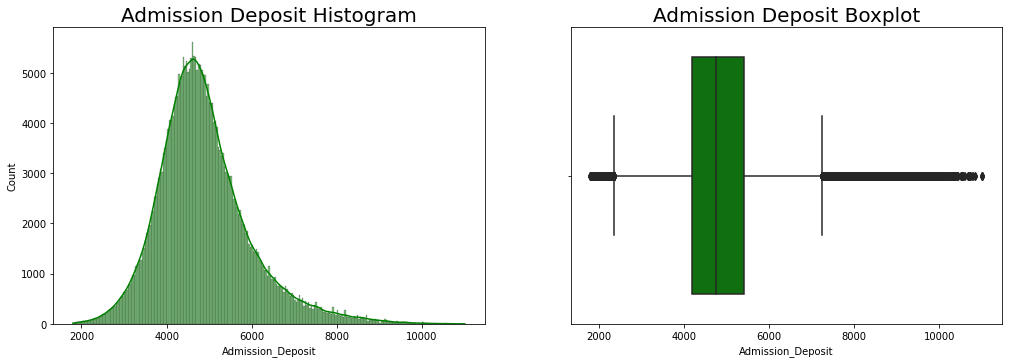

In [34]:
# Ploting the distribution of Admission Deposit 

# Figure Size
plt.figure(figsize = (17,12))

# Subplots with histograms
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df_EDA['Admission_Deposit'], kde = True, color = "green")
plt.title('Admission Deposit Histogram', fontsize = 20)

# Subplots with boxplots
plt.subplot(222)
sns.boxplot(df_EDA['Admission_Deposit'], color = "green")
plt.title('Admission Deposit Boxplot', fontsize = 20)

plt.show()

In [35]:
df_EDA.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

### Which are the mean admission for the each patient ?

In [37]:
df_EDA.groupby('patientid')['case_id'].count().mean()

3.4733131143186045

In [38]:
df_EDA.groupby('patientid')['case_id'].count().median()

3.0

**We can see that the median admission amount is smaller that the mean, it shows that there're some outliers that is making the mean have higher value**

### Which patients are causing this mean admission value becoming higher ?

In [39]:
total_admissions = df_EDA.groupby('patientid')['case_id'].count().reset_index().sort_values('case_id', ascending=False)
total_admissions

,patientid,case_id
45848,66714,50
62799,91292,43
26445,38525,39
69689,101359,36
23000,33491,34
...,...,...
27730,40387,1
67342,97941,1
67341,97939,1
41199,60024,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


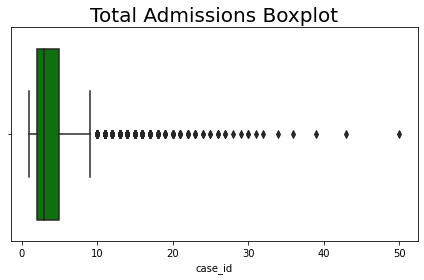

In [40]:
# Boxplot about the total admissions
sns.boxplot(total_admissions['case_id'], color = "green")
plt.title('Total Admissions Boxplot', fontsize = 20)

plt.tight_layout()

In [41]:
#calculate interquartile range 
q3, q1 = np.percentile(total_admissions['case_id'], [75 ,25])
iqr = q3 - q1
iqr

3.0

In [42]:
# geting the boxplot maximun
maximun_boxplot = q3 + 1.5*iqr
maximun_boxplot

9.5

In [43]:
# All the patients that are considered outliers (admission amount higher than the maximum)
total_admissions[total_admissions['case_id'] > 9.5]

,patientid,case_id
45848,66714,50
62799,91292,43
26445,38525,39
69689,101359,36
23000,33491,34
...,...,...
55445,80632,10
19034,27706,10
88308,128608,10
90120,131284,10


In [44]:
higher_admissions_patients = total_admissions[total_admissions['case_id'] > 9.5].shape[0]

In [45]:
unique_patients = len(df_EDA['patientid'].unique())

In [46]:
print(f"There are {unique_patients} unique patients, and {higher_admissions_patients} are considered outliers about the amount of admissions.")

There are 90344 unique patients, and 1769 are considered outliers about the amount of admissions.


### These patients that have multiple admissions have a higher Length of Stay ?

In [47]:
# Creating a list of patients that have a total admission considered as an outlier (higher than maximum)
higher_admissions_patients_list = list(total_admissions[total_admissions['case_id'] > 9.5]['patientid'])

In [48]:
# Locating all the admissions from the list create before
df_higher_admissions = df_EDA.loc[df_EDA['patientid'].isin(higher_admissions_patients_list)]
df_higher_admissions

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2,31397,7,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2,31397,7,Trauma,Extreme,2,51-60,5954.0,1
2,3,10,e,1,X,2,anesthesia,S,E,2,31397,7,Trauma,Extreme,2,51-60,4745.0,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2,31397,7,Trauma,Extreme,2,51-60,7272.0,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2,31397,7,Trauma,Extreme,2,51-60,5558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308825,308826,6,a,6,X,3,surgery,R,F,2,68141,7,Emergency,Moderate,3,71-80,5699.0,0
308826,308827,6,a,6,X,4,surgery,Q,F,2,68141,7,Emergency,Moderate,4,71-80,7675.0,0
308827,308828,17,e,1,X,2,surgery,R,E,4,68141,7,Emergency,Moderate,6,71-80,5881.0,0
308828,308829,10,e,1,X,4,anesthesia,Q,E,4,68141,7,Trauma,Moderate,4,71-80,6239.0,0


In [49]:
# Checking the proportion of Lenght of Stay into the OUTLIERS
df_higher_admissions['Stay'].value_counts() / df_higher_admissions.shape[0] * 100

0    61.486421
1    38.513579
Name: Stay, dtype: float64

**Remember that lengh of stay ≤ 30 days is 0 and > 30 days is 1**

In [50]:
# Checking the proportion of Lenght of Stay for the ENTIRE dataset
df_EDA['Stay'].value_counts() / df_EDA.shape[0] * 100

0    59.485393
1    40.514607
Name: Stay, dtype: float64

**There is a small difference, with the outliers patients having a proportion of length of stay > 30 days smaller than the complete dataset**

### Is the Length of Stay (LoS) proportional through the hospitals ?

In [57]:
# The proportion of Length of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [53]:
# Creating a list of all unique hospital codes
unique_codes = list(df_EDA['Hospital_code'].unique())

In [54]:
# Sorting the list
unique_codes.sort()

In [56]:
# Printing the proportion of LoS for each hospital code
for i in unique_codes:
    x = df_EDA[(df_EDA['Hospital_code'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['Hospital_code'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For Hospital code {i}, the proportion of High LoS/Small LoS is: {z}")
    

For Hospital code 1, the proportion of High LoS/Small LoS is: 0.8968921389396709
For Hospital code 2, the proportion of High LoS/Small LoS is: 1.2996357012750455
For Hospital code 3, the proportion of High LoS/Small LoS is: 0.49415515409139216
For Hospital code 4, the proportion of High LoS/Small LoS is: 0.2732984293193717
For Hospital code 5, the proportion of High LoS/Small LoS is: 0.5848998459167951
For Hospital code 6, the proportion of High LoS/Small LoS is: 0.5954088952654233
For Hospital code 7, the proportion of High LoS/Small LoS is: 0.30421377183967113
For Hospital code 8, the proportion of High LoS/Small LoS is: 0.5300847457627119
For Hospital code 9, the proportion of High LoS/Small LoS is: 0.7474282204821127
For Hospital code 10, the proportion of High LoS/Small LoS is: 0.5351879450240106
For Hospital code 11, the proportion of High LoS/Small LoS is: 0.589131444496052
For Hospital code 12, the proportion of High LoS/Small LoS is: 0.5829902030384779
For Hospital code 13, th

**The proportion o LoS > 30 days in the entire Dataset is 0.68 times smaller than ≤ 30 days. So if a unique hospital has this proportion higher than 0.68 it means that there is longer admissions**

**Now we can see the proportion for each hospital code. Is interesting to look deeper in the Hospitals 2, 16, 20, 22 and 32. All of then have a LoS > 30 days more than 1 time higher than LoS ≤ 30 days**

### Is the Length of Stay (LoS) proportional through the hospitals type ?

In [61]:
# The proportion of Length of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [62]:
# Creating a list of all unique hospital types
unique_types = list(df_EDA['Hospital_type_code'].unique())

In [63]:
# Sorting the list
unique_types.sort()

In [64]:
# Printing the proportion of LoS for each hospital code
for i in unique_types:
    x = df_EDA[(df_EDA['Hospital_type_code'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['Hospital_type_code'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For Hospital type {i}, the proportion of High LoS/Small LoS is: {z}")
    

For Hospital type a, the proportion of High LoS/Small LoS is: 0.5796363066311334
For Hospital type b, the proportion of High LoS/Small LoS is: 0.7845448592010478
For Hospital type c, the proportion of High LoS/Small LoS is: 0.7366929616297772
For Hospital type d, the proportion of High LoS/Small LoS is: 0.8083236164678447
For Hospital type e, the proportion of High LoS/Small LoS is: 0.6509857239972807
For Hospital type f, the proportion of High LoS/Small LoS is: 1.0356592135697764
For Hospital type g, the proportion of High LoS/Small LoS is: 1.0985636453689946


**The proprotions are very close to the entire dataset, except for the hospitals types f and g, that have a higher proportion**

### Is the Lengh of Stay (LoS) proportional through different Cities ?

In [65]:
# The proportion of Lenght of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [66]:
# Creating a list of all unique cities
unique_cities = list(df_EDA['City_Code_Hospital'].unique())

In [67]:
# Sorting the list
unique_cities.sort()

In [68]:
# Printing the proportion of LoS for each City
for i in unique_cities:
    x = df_EDA[(df_EDA['City_Code_Hospital'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['City_Code_Hospital'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For City {i}, the proportion of High LoS/Small LoS is: {z}")
    

For City 1, the proportion of High LoS/Small LoS is: 0.5816499299392807
For City 2, the proportion of High LoS/Small LoS is: 0.7938939324897473
For City 3, the proportion of High LoS/Small LoS is: 0.7156382451698134
For City 4, the proportion of High LoS/Small LoS is: 0.8049720818931135
For City 5, the proportion of High LoS/Small LoS is: 0.7063329078092913
For City 6, the proportion of High LoS/Small LoS is: 0.6481938042662665
For City 7, the proportion of High LoS/Small LoS is: 0.48594139782673035
For City 9, the proportion of High LoS/Small LoS is: 0.8208421052631579
For City 10, the proportion of High LoS/Small LoS is: 0.8968921389396709
For City 11, the proportion of High LoS/Small LoS is: 0.7568940493468795
For City 13, the proportion of High LoS/Small LoS is: 0.8895318253550762


**The proportions are very close to the entire dataset**



### Is the Lengh of Stay (LoS) proportional through the hospitals regions ?

In [69]:
# The proportion of Lenght of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [70]:
# Creating a list of all unique regions
unique_regions = list(df_EDA['Hospital_region_code'].unique())

In [71]:
# Sorting the list
unique_regions.sort()

In [73]:
# Printing the proportion of LoS for each Region
for i in unique_regions:
    x = df_EDA[(df_EDA['Hospital_region_code'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['Hospital_region_code'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For Region {i}, the proportion of High LoS/Small LoS is: {z}")
    

For Region X, the proportion of High LoS/Small LoS is: 0.6475425318910478
For Region Y, the proportion of High LoS/Small LoS is: 0.7033321138096981
For Region Z, the proportion of High LoS/Small LoS is: 0.7110048640282998


**The proportions are very close to the entire dataset**



### Is the Lengh of Stay (LoS) proportional through the Departments ?

In [74]:
# The proportion of Lenght of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [75]:
# Creating a list of all unique departments
unique_departments = list(df_EDA['Department'].unique())

In [76]:
# Sorting the list
unique_departments.sort()

In [77]:
# Printing the proportion of LoS for each Region
for i in unique_departments:
    x = df_EDA[(df_EDA['Department'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['Department'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For the Department of {i}, the proportion of High LoS/Small LoS is: {z}")
    

For the Department of TB & Chest disease, the proportion of High LoS/Small LoS is: 0.657323055360897
For the Department of anesthesia, the proportion of High LoS/Small LoS is: 0.5365622532245328
For the Department of gynecology, the proportion of High LoS/Small LoS is: 0.6960904029637601
For the Department of radiotherapy, the proportion of High LoS/Small LoS is: 0.7123654278936804
For the Department of surgery, the proportion of High LoS/Small LoS is: 1.019434628975265


**The proprotions are very close to the entire dataset, except for the department of surgery, that have a higher proportion**

### Is the Lengh of Stay (LoS) proportional through the Cities where the patients are from ?

In [78]:
# The proportion of Lenght of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [79]:
# Creating a list of all unique departments
unique_cities_patients = list(df_EDA['City_Code_Patient'].unique())

In [80]:
# Sorting the list
unique_cities_patients.sort()

In [81]:
# Printing the proportion of LoS for each patient City
for i in unique_cities_patients:
    x = df_EDA[(df_EDA['City_Code_Patient'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['City_Code_Patient'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For the City {i}, the proportion of High LoS/Small LoS is: {z}")
    

For the City 1, the proportion of High LoS/Small LoS is: 0.6359630066414251
For the City 2, the proportion of High LoS/Small LoS is: 0.5849079704525977
For the City 3, the proportion of High LoS/Small LoS is: 1.0816777041942605
For the City 4, the proportion of High LoS/Small LoS is: 0.6390280294148993
For the City 5, the proportion of High LoS/Small LoS is: 0.7979047277936963
For the City 6, the proportion of High LoS/Small LoS is: 0.5844327176781002
For the City 7, the proportion of High LoS/Small LoS is: 0.7252954397157979
For the City 8, the proportion of High LoS/Small LoS is: 0.7259059206771261
For the City 9, the proportion of High LoS/Small LoS is: 0.6945402298850575
For the City 10, the proportion of High LoS/Small LoS is: 0.5071929177425304
For the City 11, the proportion of High LoS/Small LoS is: 0.4853273137697517
For the City 12, the proportion of High LoS/Small LoS is: 0.6145267372033171
For the City 13, the proportion of High LoS/Small LoS is: 0.4679313459801265
For the 

**The City 3 is the only one that have a proportion of LoS > 30 days higher than 1 time**

### Is the Lengh of Stay (LoS) proportional through type of Admission?

In [82]:
# The proportion of Lenght of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [83]:
# Creating a list of all unique type of admission
unique_type_admission = list(df_EDA['Type of Admission'].unique())

In [84]:
# Sorting the list
unique_type_admission.sort()

In [86]:
# Printing the proportion of LoS for each type od admission
for i in unique_type_admission:
    x = df_EDA[(df_EDA['Type of Admission'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['Type of Admission'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For {i} admissions, the proportion of High LoS/Small LoS is: {z}")
    

For Emergency admissions, the proportion of High LoS/Small LoS is: 0.6051893213323333
For Trauma admissions, the proportion of High LoS/Small LoS is: 0.7832160362691226
For Urgent admissions, the proportion of High LoS/Small LoS is: 0.5777755853722705


**Very close to the entire dataset proportion.**

### Do older patients have a higher Lenght of Stay ?

In [87]:
# The proportion of Lenght of Stay of the COMPLETE dataset
df_EDA[df_EDA['Stay'] == 1]['Stay'].shape[0] / df_EDA[df_EDA['Stay'] == 0]['Stay'].shape[0]

0.6810849615077601

**The amount of LoS > 30 days are 0.68 times smaller than ≤ 30 days**

In [88]:
# Creating a list of all unique age range
unique_ages = list(df_EDA['Age'].unique())

In [89]:
# Sorting the list
unique_ages.sort()

In [90]:
# Printing the proportion of LoS for each type od admission
for i in unique_ages:
    x = df_EDA[(df_EDA['Age'] == i) & (df_EDA['Stay'] == 1)].shape[0]
    y = df_EDA[(df_EDA['Age'] == i) & (df_EDA['Stay'] == 0)].shape[0]
    z = x/y
    print(f"For {i} admissions, the proportion of High LoS/Small LoS is: {z}")
    

For 0-10 admissions, the proportion of High LoS/Small LoS is: 0.5394180552101467
For 11-20 admissions, the proportion of High LoS/Small LoS is: 0.49466738973246566
For 21-30 admissions, the proportion of High LoS/Small LoS is: 0.5617777088342512
For 31-40 admissions, the proportion of High LoS/Small LoS is: 0.6198637208341937
For 41-50 admissions, the proportion of High LoS/Small LoS is: 0.69351611507679
For 51-60 admissions, the proportion of High LoS/Small LoS is: 0.7400458999672143
For 61-70 admissions, the proportion of High LoS/Small LoS is: 0.7626345654133744
For 71-80 admissions, the proportion of High LoS/Small LoS is: 0.8166589589435281
For 81-90 admissions, the proportion of High LoS/Small LoS is: 1.111352525801195
For 91-100 admissions, the proportion of High LoS/Small LoS is: 1.0769230769230769


**It seens like the LoS is increasing while the age increases. Positive correlation**

## Insights
* The mean admission amount for patient is 3.4
* Some patients have a high number of admissions. There are 90344 unique patients, and 1769 were admitted more than 9 times
* These patients that have multiple admissions have a higher Length of Stay ? There is a small difference, with the outliers patients having a proportion of lenght of stay > 30 days smaller than the complete dataset
* Deeper look into Hospitals codes 2, 16, 20, 22 and 32. All of then have a LoS > 30 days more than 1 time higher than LoS ≤ 30 days
* Deeper look into hospitals types f and g, that have a higher proportion of LoS > 30 days
* The Surgery department have a higher proportion of longer LoS
* Positive correlation between age and longer LoS